In [1]:
print("Problem_3")

Problem_3


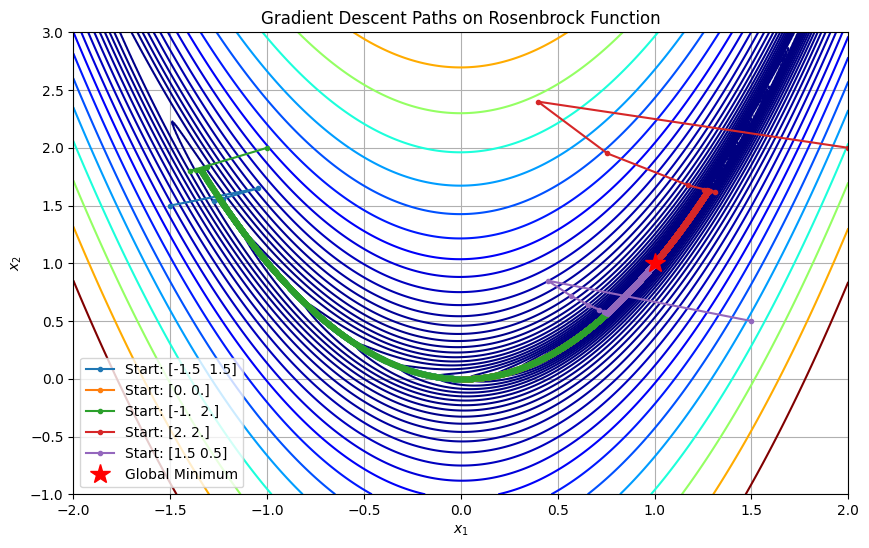

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function definition
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2  # Rosenbrock function formula

# Gradient of the Rosenbrock function
def rosenbrock_grad(x):
    df_dx1 = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])  # Partial derivative with respect to x1
    df_dx2 = 200 * (x[1] - x[0]**2)  # Partial derivative with respect to x2
    return np.array([df_dx1, df_dx2])  # Combine gradients into a vector

# Gradient Descent Algorithm
def gradient_descent_rosenbrock(x0, alpha=0.001, max_iter=10000, tol=1e-6):
    x = x0.copy()  # Initialize x from x0
    path = [x.copy()]  # Store path for plotting
    for _ in range(max_iter):  # Iterate for max_iter steps
        grad = rosenbrock_grad(x)  # Compute gradient
        x -= alpha * grad  # Update x with gradient step
        path.append(x.copy())  # Save point in path
        if np.linalg.norm(grad) < tol:  # Stop if gradient is small
            break
    return np.array(path)  # Return entire path

# Define initial points to visualize convergence sensitivity
initial_points = [
    np.array([-1.5, 1.5]),  # far from global minimum
    np.array([0.0, 0.0]),   # origin
    np.array([-1.0, 2.0]),  # another steep side
    np.array([2.0, 2.0]),   # upper right of the valley
    np.array([1.5, 0.5])    # inside the valley near minimum
]

# Prepare meshgrid for contour plotting
x_vals = np.linspace(-2, 2, 400)  # x range for contour plot
y_vals = np.linspace(-1, 3, 400)  # y range for contour plot
X, Y = np.meshgrid(x_vals, y_vals)  # Create grid mesh
Z = 100 * (Y - X**2)**2 + (1 - X)**2  # Evaluate Rosenbrock function over the grid

# Plotting the function contours and gradient descent paths
plt.figure(figsize=(10, 6))  # Set plot size
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 30), cmap='jet')  # Plot contours in log scale
for pt in initial_points:  # For each initial point
    path = gradient_descent_rosenbrock(pt)  # Perform gradient descent
    plt.plot(path[:, 0], path[:, 1], marker='o', markersize=3, label=f'Start: {pt}')  # Plot path
plt.plot(1, 1, 'r*', markersize=15, label='Global Minimum')  # Mark the global minimum
plt.title("Gradient Descent Paths on Rosenbrock Function")  # Title of the plot
plt.xlabel("$x_1$")  # x-axis label
plt.ylabel("$x_2$")  # y-axis label
plt.legend()  # Show legend with starting points
plt.grid(True)  # Add grid for better readability
plt.show()  # Render the plot
